## Exercise 2

### 2.1: Make an algorithm to generate [random walks](https://en.wikipedia.org/wiki/Random_walk) on a NetworkX graphs.

The form is `random_walk(G, nodeid, length)` so the input should be a graph, node ID and the number of steps to take in the random walk. The output is a list of node IDs in the walks

```
G = nx.binomial_graph(25, 0.3, directed=True)

# this output is random
# don't try to reproduce it exactly
random_walk(G, 3, 5) -> [3, 1, 4, 2, 3]
```

In [2]:
# exercise 2.1

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

def random_walk(G, nodeid, length):
    steps = []
    node = nodeid
    for step in range(length):
        step_dict = dict(G[node])
        neighbours = list(step_dict.keys())
        rand_step = neighbours[np.random.randint(0,len(neighbours))]
        steps.append(rand_step)
        node=rand_step
    return steps

In [3]:
G = nx.binomial_graph(25, 0.3, directed=True)

In [4]:
def draw(graph):
    fig, ax = plt.subplots(figsize=(10.5, 10.5))
    pos = nx.spring_layout(graph)
    nx.draw_networkx(graph, with_labels=True, 
                     node_color='pink', width=0.3)
    plt.axis('off')
    plt.show()

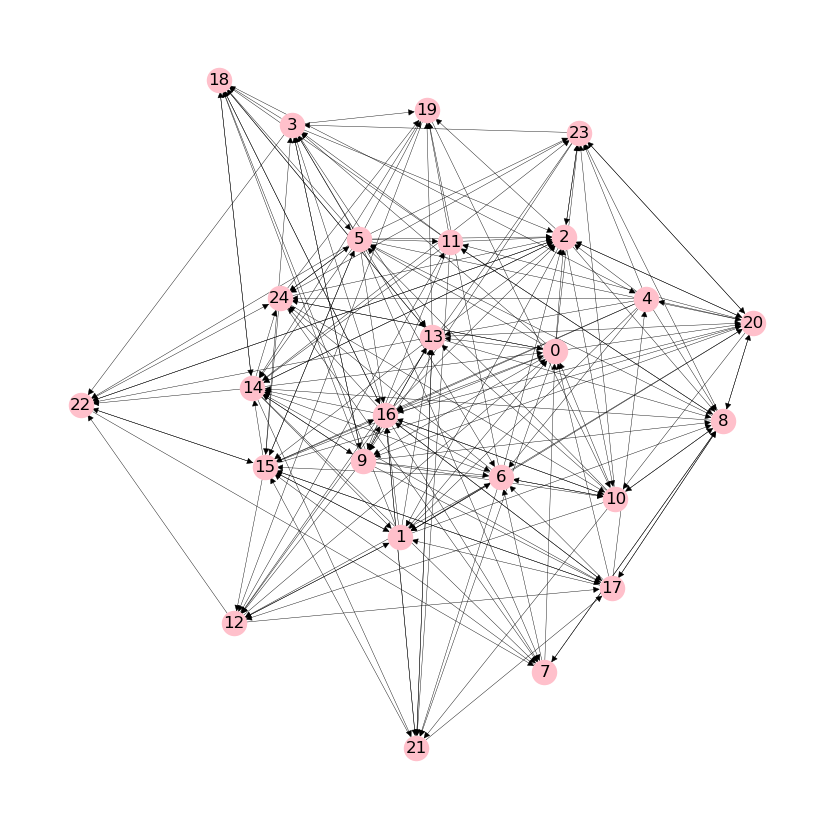

In [5]:
draw(G)

In [10]:
###### Answer 2.1 ######

random_walk(G, 3, 5)

[9, 8, 5, 24, 2]

In [11]:
G[3]

AtlasView({2: {}, 6: {}, 9: {}, 13: {}, 18: {}, 19: {}, 22: {}})

### 2.2: Modify your random walk algorithm so that:

- It takes in on a weighed graph's adjacency matrix (a numpy matrix). 
- The probability to go from node A to node B should be proportional to the weight on their edge (relative to the other edges starting at node A).

Example:
```
G = np.array([
    [0, 0.5, 0, 0.5],
    [0.5, 0, 0, 0.5],
    [0.25, 0.25, 0.25, 0.25],
    [0.5, 0.5, 0, 0],
])

random_walk(G, 0, 4) -> [0, 1, 0, 3]
```

Here, `node 0` would give us 50% chance to transition to `node 1` and 50% chance to transition to `node 3`. Then `node 1` would give us 50% chance to transition to `node 0` and 50% to `node 3`, etc.

In [7]:
# exercise 2.2

def random_array():
    adj_M = nx.adjacency_matrix(G)
    adj_m = nx.adjacency_matrix(G).todense()
    weighed_adj_m = np.zeros([len(adj_m),len(adj_m[0].A1)])
    for i in range(len(adj_m)):
        neighbours_i = 0
        probability = 100
        count = 0
        for j in range(len(adj_m[i].A1)):
            if adj_m[i,j] == 1:
                neighbours_i +=1
                count += 1
        for j in range(len(adj_m[i].A1)):
            if adj_m[i,j] == 1:
                if count > 1:
                    num = round(probability*np.random.random()*0.5,3)
                    probability -= num
                    weighed_adj_m[i,j] = num
                    count -= 1
                else:
                    num = probability
                    weighed_adj_m[i,j] = round(num,3)
    return weighed_adj_m

W = random_array()

C:\Users\Simona\AppData\Local\Temp\ipykernel_10048\1883932239.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_M = nx.adjacency_matrix(G)
C:\Users\Simona\AppData\Local\Temp\ipykernel_10048\1883932239.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_m = nx.adjacency_matrix(G).todense()


<class 'networkx.classes.digraph.DiGraph'>


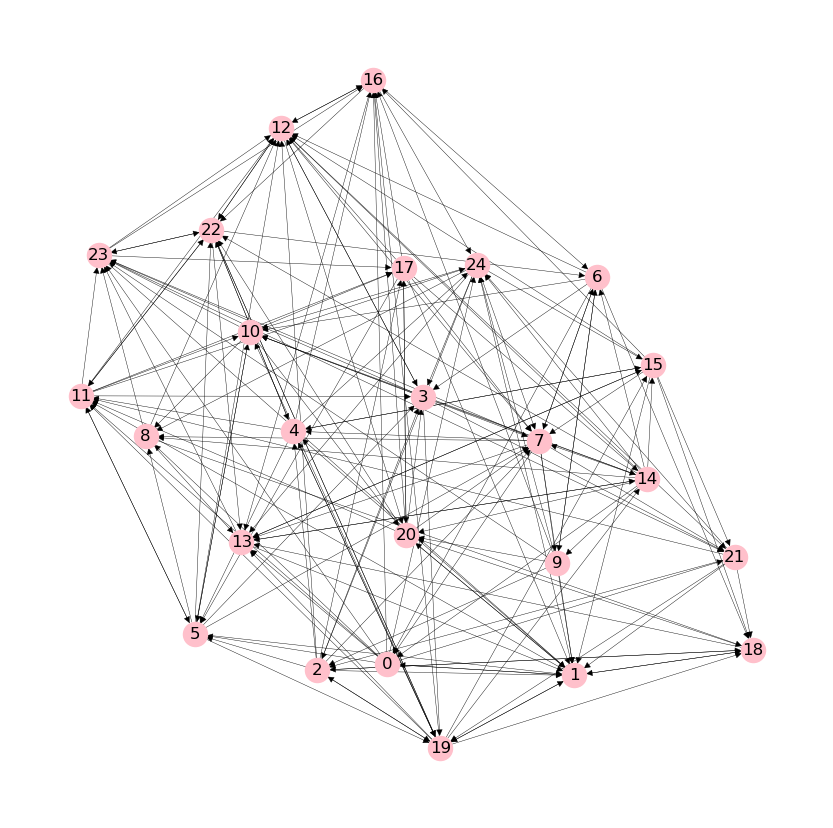

In [8]:
def add_random_weight(graph, M):
    ebunch = []
    for i in range(len(M)):
        for j in range(len(M[i])):
            if M[i,j]>0:
                ebunch.append(tuple([i,j,M[i,j]]))
    graph.add_weighted_edges_from(ebunch, weight='weight')
    return graph

B = nx.DiGraph()
W_graph= add_random_weight(B,W)
print(type(W_graph))
draw(W_graph)

In [17]:
import random

def weighted_random_walk(G, nodeid, length):
    steps = []
    node = nodeid
    attributes = nx.get_edge_attributes(G, 'weight')
    for step in range(length):
        step_dict = dict(G[node])
        neighbours = list(step_dict.keys())
        weights = []
        for neighbour in neighbours:
            weights.append(attributes[(node,neighbour)])
        rand_step = random.choices(neighbours, weights,k=1)[0]
        steps.append(rand_step)
        node=rand_step
        print(f"Neighbours: {neighbours}\nWeights: {weights}\n")
    return steps

In [18]:
###### Answer 2.2 ######

weighted_random_walk(W_graph, 3, 5)

Neighbours: [10, 12, 14, 19, 21, 23]
Weights: [36.124, 2.224, 16.333, 13.576, 14.471, 17.272]

Neighbours: [5, 7, 8, 17, 20, 23]
Weights: [6.876, 38.985, 22.461, 1.5, 12.545, 17.633]

Neighbours: [1, 3, 7, 11, 16, 17, 22]
Weights: [46.962, 16.873, 0.561, 11.605, 8.012, 4.165, 11.822]

Neighbours: [10, 12, 14, 19, 21, 23]
Weights: [36.124, 2.224, 16.333, 13.576, 14.471, 17.272]

Neighbours: [1, 2, 4, 10, 11, 13, 14, 15, 16, 18, 22]
Weights: [28.77, 16.666, 6.631, 8.411, 7.892, 10.012, 8.485, 0.303, 1.342, 0.12, 11.368]



[10, 20, 3, 19, 2]

In [11]:
W_graph[3]

AtlasView({10: {'weight': 36.124}, 12: {'weight': 2.224}, 14: {'weight': 16.333}, 19: {'weight': 13.576}, 21: {'weight': 14.471}, 23: {'weight': 17.272}})

### 3.1: computing node degrees of graphs (take 2)

For the graph made by your function in the previous workshop, calculate the **diameter** AND the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_diameter_and_degrees` which takes a networkx graph object as input, and returns a `dict` with the diameter and the degrees of all the nodes in the graph.

**NOTE:** You cannot use the diameter or degree method from networkx directly to compute the degrees. 

```
compute_diameter_and_degrees(G) -> {
    'diameter': 3,
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}
```

In [12]:
#3.1

def S_path(graph, source, target):
    i = 0
    path = nx.shortest_path(graph, source, target)
    return path

def LS_path(graph):
    s_paths = []
    for start in list(graph.nodes):
        for end in list(graph.nodes):
            s_paths.append(len(S_path(graph, start, end))-1)
    return max(s_paths)

def compute_diameter_and_degrees(graph):
    keys = []
    values = []
    keys.append("diameter")
    values.append(LS_path(graph))
    for node in list(graph.nodes()):
        keys.append(f"degree_:{node}")
        values.append(str(len(graph[node].values())))
    res_dict = dict(zip(keys,values))
    return res_dict

In [13]:
compute_diameter_and_degrees(W_graph)

{'diameter': 3,
 'degree_:0': '9',
 'degree_:1': '7',
 'degree_:5': '9',
 'degree_:8': '4',
 'degree_:11': '8',
 'degree_:13': '4',
 'degree_:16': '5',
 'degree_:21': '6',
 'degree_:23': '6',
 'degree_:24': '7',
 'degree_:4': '7',
 'degree_:18': '4',
 'degree_:19': '11',
 'degree_:20': '7',
 'degree_:2': '9',
 'degree_:3': '6',
 'degree_:7': '9',
 'degree_:12': '6',
 'degree_:17': '7',
 'degree_:10': '6',
 'degree_:14': '12',
 'degree_:15': '8',
 'degree_:22': '7',
 'degree_:6': '7',
 'degree_:9': '7'}

In [14]:
nx.diameter(W_graph)

3